In [2]:

import pandas as pd


In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\aa122\Downloads\sales_data_sample.csv", encoding='ISO-8859-1')



In [6]:
df.drop_duplicates(inplace=True)


In [13]:
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [15]:
df.columns


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [16]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [17]:
df.drop_duplicates(inplace=True)


In [18]:
df = df[(df['QUANTITYORDERED'] > 0) & (df['PRICEEACH'] > 0) & (df['SALES'] > 0)]


In [19]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])



In [21]:
df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)


PRODUCTCODE
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S24_3856    140626.90
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
Name: SALES, dtype: float64

In [22]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)


COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

C:\Users\aa122\AppData\Local\Temp\ipykernel_4652\1589496118.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='ORDERDATE')['SALES'].sum()


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='ORDERDATE'>

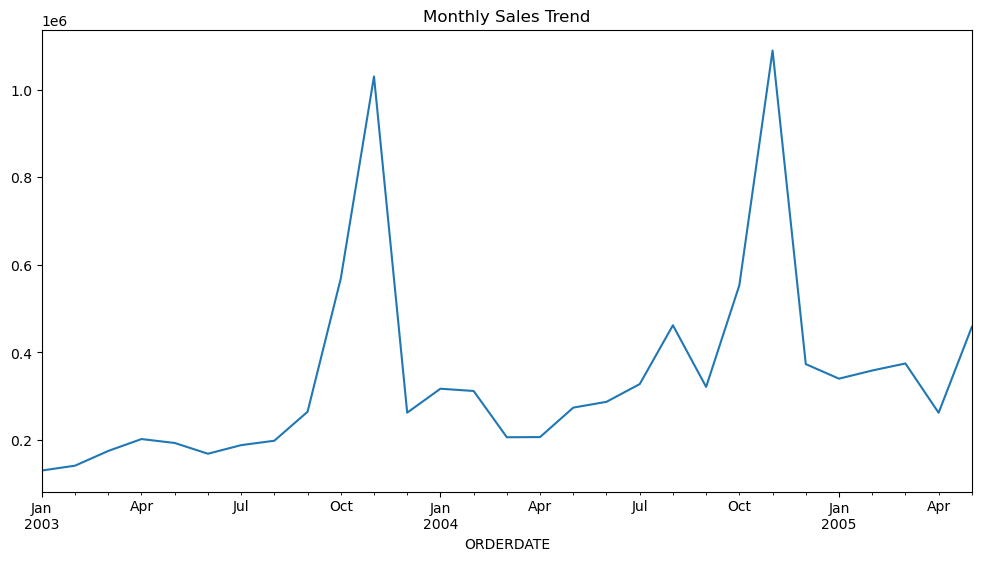

In [25]:
monthly_sales = df.resample('M', on='ORDERDATE')['SALES'].sum()
monthly_sales.plot(kind='line', figsize=(12,6), title='Monthly Sales Trend')



In [26]:
df.groupby(['CONTACTFIRSTNAME', 'CONTACTLASTNAME'])['SALES'].sum().sort_values(ascending=False).head(10)


CONTACTFIRSTNAME  CONTACTLASTNAME
Diego             Freyre             912294.11
Valarie           Nelson             654858.06
Peter             Ferguson           200995.41
Jeff              Young              197736.94
Janine            Labrune            180124.90
Eric              Natividad          172989.68
Kwai              Yu                 164069.44
Sue               Frick              160010.27
Victoria          Ashworth           157807.81
Anna              O'Hara             153996.13
Name: SALES, dtype: float64

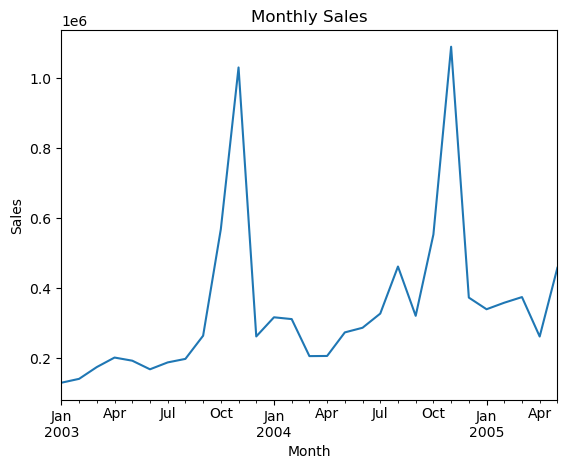

In [28]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


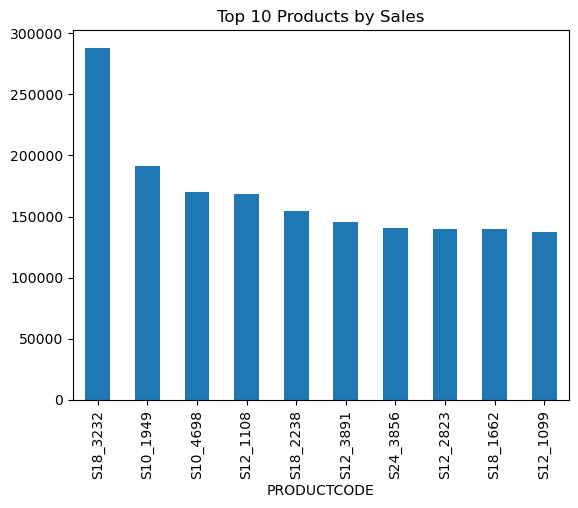

In [29]:
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.show()


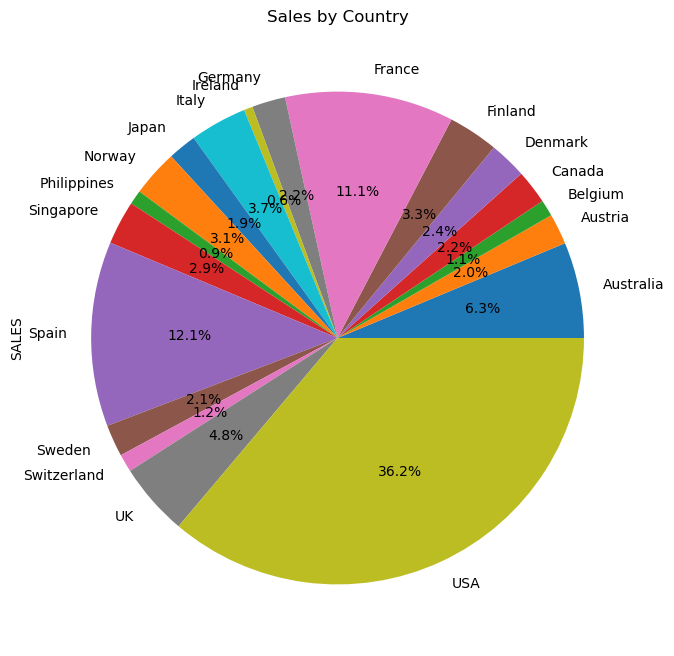

In [30]:
country_sales = df.groupby('COUNTRY')['SALES'].sum()
country_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Sales by Country')
plt.show()
